In [1]:
import tinny
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
data_train = pd.read_csv('./data/regression/boston.csv').values

m, n = data_train.shape

X_train = data_train[:, :-1]  
y_train = data_train[:, -1] 

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=400, random_state=42)

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(X_train).T
X_test = scaler_X.transform(X_test).T

y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).T
y_test = scaler_y.transform(y_test.reshape(-1, 1)).T

Iteration 0
Loss: 0.055750923291623324
Iteration 10
Loss: 0.03883692086427475
Iteration 20
Loss: 0.03229180507003854
Iteration 30
Loss: 0.02783090246539788
Iteration 40
Loss: 0.024675737875947526
Iteration 50
Loss: 0.022325802937064036
Iteration 60
Loss: 0.020521512053065356
Iteration 70
Loss: 0.019077916303968757
Iteration 80
Loss: 0.017926273382330847
Iteration 90
Loss: 0.01698940830714297
Iteration 100
Loss: 0.016234448928926403
Iteration 110
Loss: 0.015615125383754086
Iteration 120
Loss: 0.01510561701804186
Iteration 130
Loss: 0.014680346418623006
Iteration 140
Loss: 0.014311614514075739
Iteration 150
Loss: 0.013993937980616347
Iteration 160
Loss: 0.013714777730956007
Iteration 170
Loss: 0.013472090673896849
Iteration 180
Loss: 0.013260767747677083
Iteration 190
Loss: 0.01307475078898781
Iteration 200
Loss: 0.01291048556047126
Iteration 210
Loss: 0.012765796833841388
Iteration 220
Loss: 0.012636562274553575
Iteration 230
Loss: 0.012520528697388202
Iteration 240
Loss: 0.012415371648

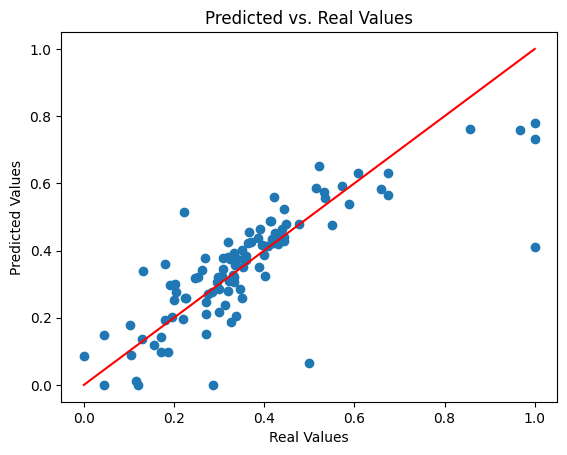

In [3]:
l1 = tinny.DenseLayer(13, 13, "ReLU")
l2 = tinny.OutputLayer(13, 1, "ReLU")
nn = tinny.TiNNyNetwork(problem_type="regression", loss_function="mse", layers=[l1, l2])

nn.train(X_train, y_train, iterations=350, learning_rate=0.01)
nn.test(X_test, y_test, plot=True)